在RNN计算中，介绍到对于长期依赖的问题，没法进行解决，可能产生梯度消失和梯度爆炸的问题；LSTM特别适合解决这类需要长时间依赖的问题

LSTM是RNN的一种，大体结构一致，区别在于：

- LSTM的“记忆细胞”是改造过的
- 该记录的信息会一直传递，不该记录的信息会被截断掉

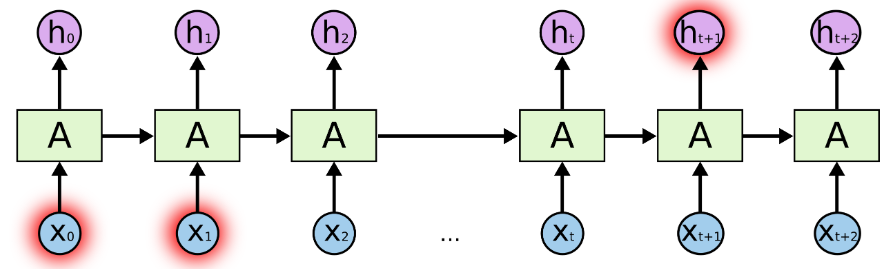

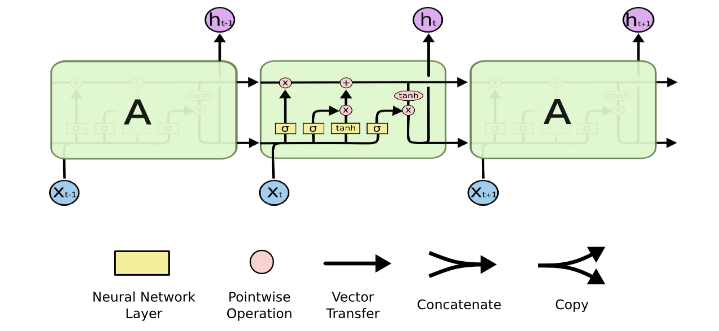

在上面的图例中：
- 每一条黑线传输着一整个向量，从一个节点的输出到其他节点的输入
- 粉色的圈代表pointwise 的操作，诸如向量的和
- 黄色的矩阵就是学习到的神经网络层
- 合在一起的线表示向量的连接
- 分开的线表示内容被复制，然后分发到不同的位置

## cell state
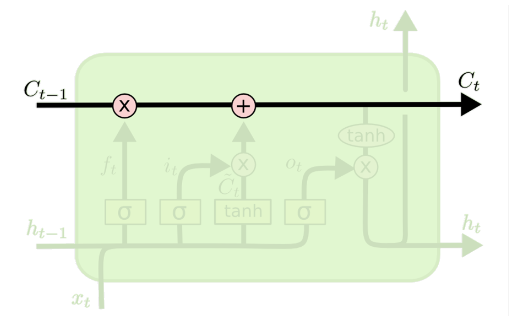
cell state：类似于传送带。直接在整个链上运行，只有一些少量的线性交互。信息在上面流传保持不变很容易。

LSTM可以通过gates(“门”)结构来去除或者增加“cell state”的信息

包含一个sigmoid神经网络层次和一个pointwist乘法操作

    Sigmoid层输出一个0到1之间的概率值，描述每个部分有多少量可以通过，0表示“不允许任务变量通过”，1表示“运行所有变量通过”
    
LSTM中主要有三个“门”结构来控制“cell state”：

### 忘记门
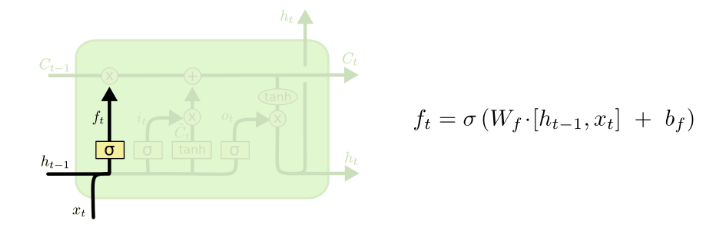

决定从“细胞状态”中<span class="mark">丢弃什么信息</span>；比如在语言模型中，细胞状态可能包含了性别信息(“他”或者“她”)，当我们看到新的代名词的时候，可以考虑忘记旧的数据

### 输入门
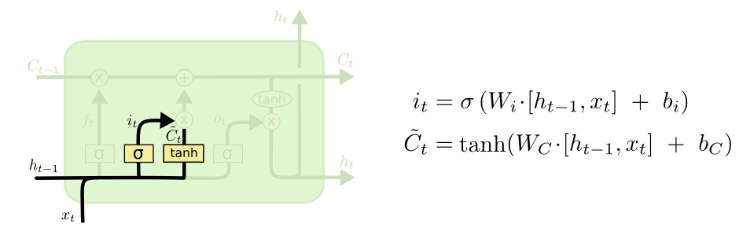
直接通过➕操作，加到cell state中

经过第一个和第二个“门”后，可以确定传递信息的删除和增加，即可以进行“cell state”的更新更新Ct-1为Ct;
- 将旧状态与ft相乘，丢失掉确定不要的信息；
- 加上新的候选值it\*Ct得到最终更新后的“cell state”

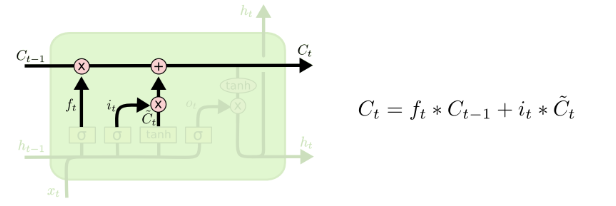

### 输出门
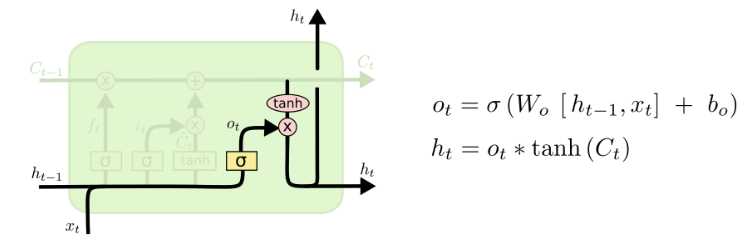
- 首先将输入数据运行一个sigmoid层来确定cell state的那个部分将输出
- 使用tanh处理细胞状态得到一个-1到1之间的值，再将它和sigmoid门的输出相乘，输出程序确定输出的部分。


## GRU
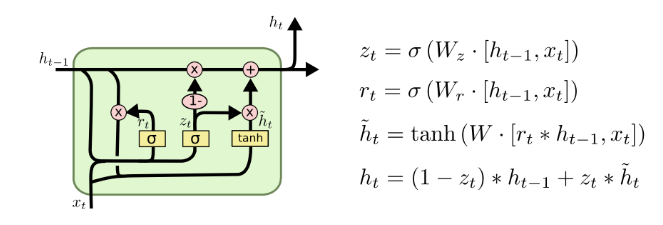

- 将忘记门和输入门合并成为一个单一的更新门
- 同时合并了数据单元状态和隐藏状态
- 结构比LSTM的结构更加简单

## 双向LSTM
双向卷积神经网络的隐藏层要保存两个值，一个A参与正向计算，另一个值A'参与反向计算。最终的输出值Y2取决于A2和A‘2。

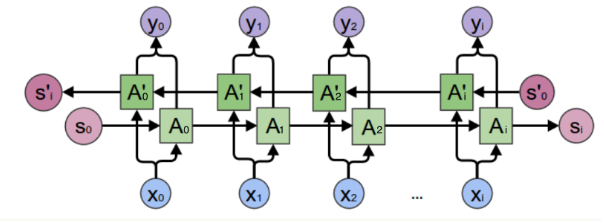

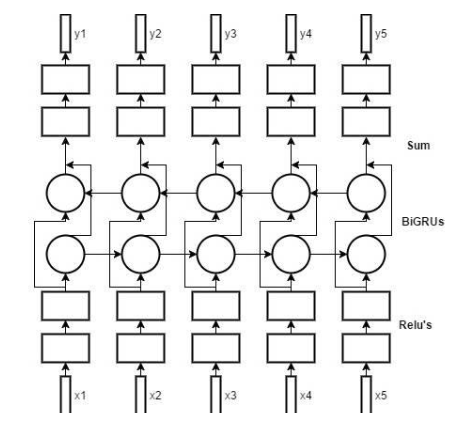

 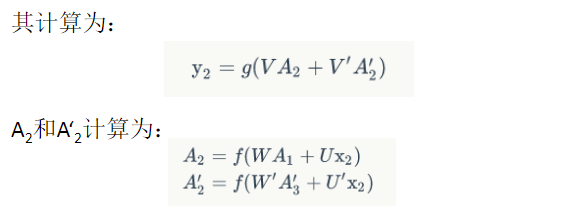

正向计算时，隐藏层的值st与st-1有关；反向计算时，隐藏层的值st`与st+1`有关；最终的输出取决于正向和反向计算的加和。双向循环神经网络的计算方法为：

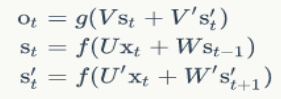

## 文本分类任务

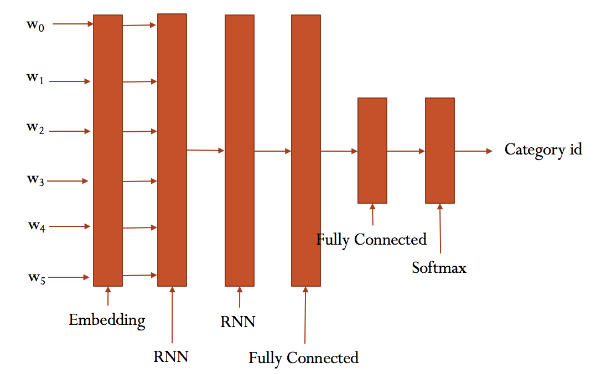

- 词转化为向量：embedding
- 输出包括每个time step的hidden state

和取最后一个time step的输出为fully connected layer的输入不同，还有一种计算输入的思路，如下：
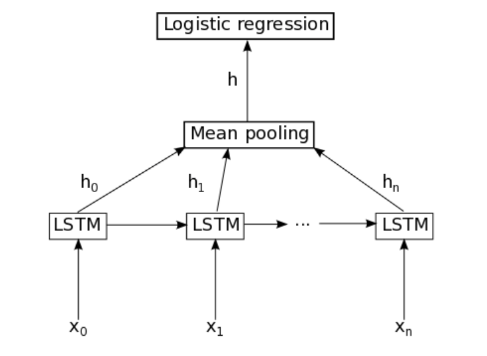

每个word经过embedding之后，进入LSTM层，这里LSTM是标准的LSTM，然后经过一个时间序列得到的t个隐藏LSTM神经单元的向量，这些向量经过<span class="burk">mean pooling</span>层之后，可以得到一个向量h，然后紧接着是一个简单的逻辑斯蒂回归层（戒者一个softmax层）得到一个类别分布向量。

time step维度上的mean pooling

代码中是取最后一个time step的hidden state，作为fc层的输入